In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.datasets
import matplotlib


wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [23]:
cultivars.shape

(178,)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


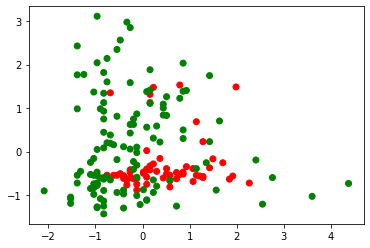

In [14]:
covMatrixArr = np.array(data.cov())
eigValue, eigVector = np.linalg.eig(covMatrixArr)

index_sort = np.argsort(-eigValue)

# sort the eigenvalue to obtain the largest-k components
eigValue_sorted = eigValue[index_sort]
eigVector_sorted = eigVector[:, index_sort]

data_pca = np.array(data).dot(eigVector)

label = []
for i in range(np.array(data['magnesium']).shape[0]):
    if cultivars[i] == 'Cultivar0':
        label.append(0)
    else:
        label.append(1)

colors = ['red', 'green']

print(label)
plt.scatter(data['magnesium'], data['malic_acid'], c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


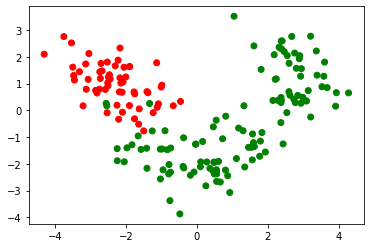

In [15]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

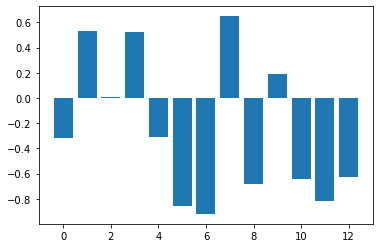

In [16]:
# first principal component (PC1)
loading_pc1 = eigVector_sorted[:,0] * np.sqrt(eigValue_sorted[0])
plt.bar(np.arange(loading_pc1.shape[0]),loading_pc1)
plt.show()

In [ ]:
# second principal component (PC2)
loading_pc2 = eigVector_sorted[:,1] * np.sqrt(eigValue_sorted[1])
plt.bar(np.arange(loading_pc2.shape[0]),loading_pc2)
plt.show()

In [ ]:
plt.bar(np.arange(13), eigValue)
plt.show()

In [ ]:
plt.bar(np.arange(13), eigValue_sorted)
plt.show()